<a href="https://colab.research.google.com/github/chasuar/Raspberry_study/blob/main/4_Opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

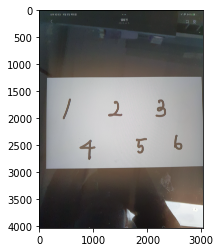

In [2]:
img=cv2.imread("/content/drive/MyDrive/창의적종합설계/2주차/opencv_test.jpg")
plt.imshow(img)

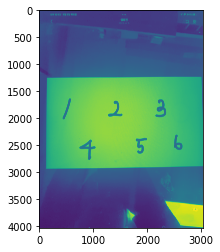

In [3]:
# 흑백 처리
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

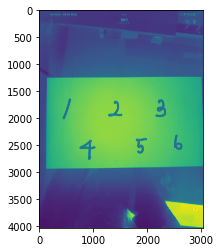

In [4]:
#가우시안 블러
img_blur=cv2.GaussianBlur(img_gray, (5,5),0)
plt.imshow(img_blur)

In [5]:
#이미지 내의 경계
ret, img_th = cv2.threshold(img_blur, 100, 230, cv2.THRESH_BINARY_INV)
contours, hierachy= cv2.findContours(img_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#경계 박스 구하기
rects = [cv2.boundingRect(each) for each in contours]

In [6]:
#왼쪽에 있는 경계 순서대로 정렬
rects=sorted(rects)
tmp = [w*h for (x,y,w,h) in rects]
tmp.sort()


In [7]:
plus=100
rects = [(x,y,w,h) for (x,y,w,h) in rects if ((w*h>15000)and(w*h<500000))]
rects

[(437, 1639, 152, 380),
 (748, 2402, 292, 368),
 (1276, 1719, 260, 249),
 (1814, 2369, 176, 285),
 (2149, 1655, 195, 323),
 (2490, 2309, 153, 276)]

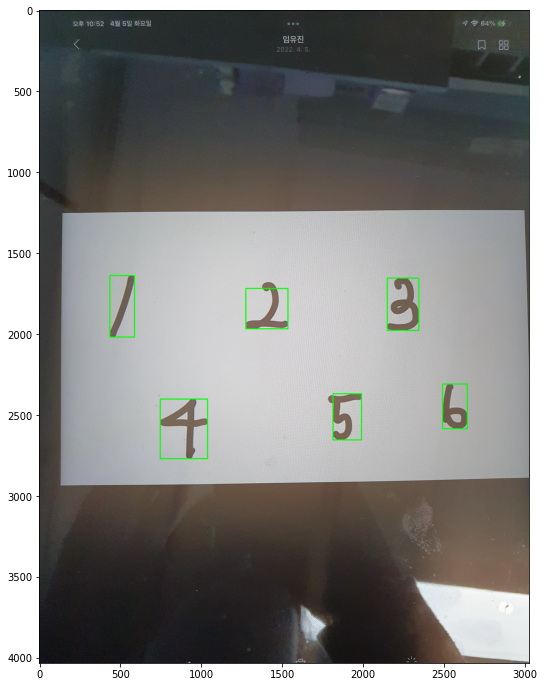

In [8]:
img_for_class=img_blur.copy()
for rect in rects:
    # Draw the rectangles
    cv2.rectangle(img, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 

plt.figure(figsize=(15,12))
plt.imshow(img);

In [9]:

plus=100
img_class=[]
for rect in rects:
    img_class.append(img_for_class[rect[1]-plus : rect[1]+rect[3]+plus, rect[0]-plus : rect[0]+rect[2]+plus])

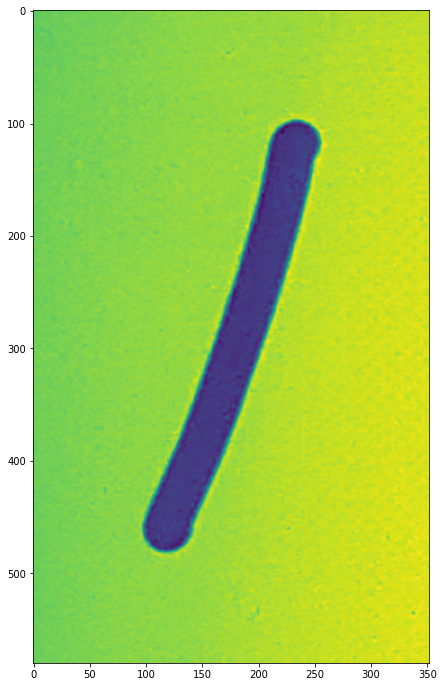

In [10]:
plt.figure(figsize=(15,12))
plt.imshow(img_class[0]);

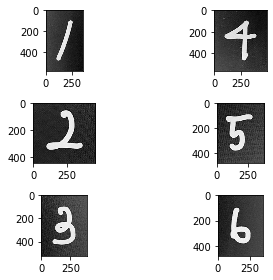

In [11]:
count=0
for n in img_class:
  count=count+1
  plt.subplot(3, 2, count)
  plt. imshow(n, cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

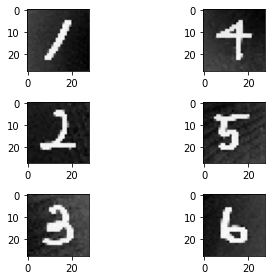

In [12]:
count=0
for n in img_class:
  count=count+1
  plt.subplot(3, 2, count)
  plt. imshow(cv2.resize(n,(28,28)), cmap='Greys')

plt.tight_layout()
plt.show()

In [13]:
from keras.models import load_model

model = load_model('/content/drive/MyDrive/창의적종합설계/2주차/Predict_Model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

[1]


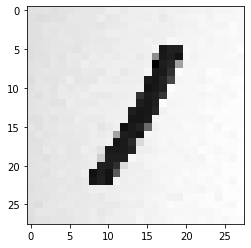

In [14]:

test=cv2.resize(img_class[0],(28,28))
test=255-test
test=test/255.0
plt.imshow(test,cmap='Greys')
test=test.reshape((1,28,28,1))
predict=model.predict_on_batch(test)
mypred=np.argmax(predict, axis=1)
print(mypred)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


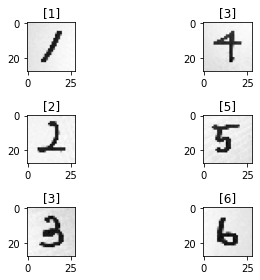

In [15]:
count=0
for n in img_class:
  count=count+1
  plt.subplot(3, 2, count)
  test=cv2.resize(n,(28,28))
  test=255-test
  test=test/255.0
  plt.imshow(test,cmap='Greys')
  test=test.reshape((1,28,28,1))
  predict=model.predict_on_batch(test)
  mypred=np.argmax(predict, axis=1)
  plt.title(mypred)


plt.tight_layout()
plt.show()

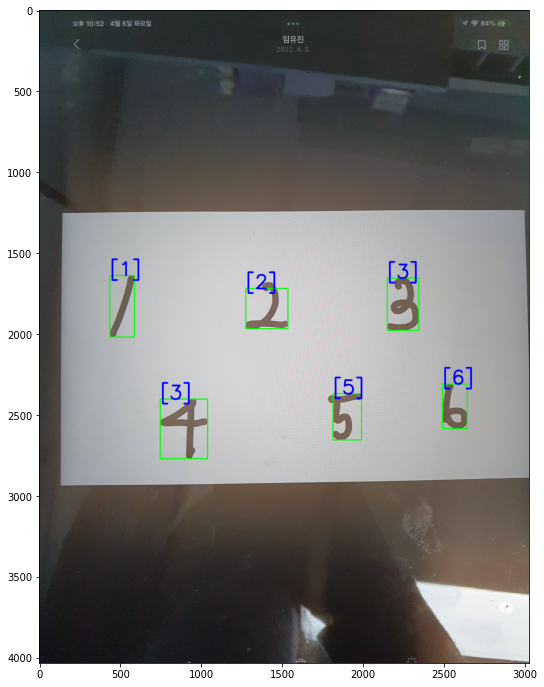

In [16]:
img_result=[]
img_for_class=img_blur.copy()
count=0
plus=100

for rect in rects:
          img_result=img_for_class[rect[1]-plus : rect[1]+rect[3]+plus, rect[0]-plus : rect[0]+rect[2]+plus]
          test=cv2.resize(img_result,(28,28))

          test=255-test
          test=test/255.0
          test=test.reshape((1,28,28,1))
          predict=model.predict_on_batch(test)
          mypred=np.argmax(predict, axis=1)


          #사각형 그리기
          cv2.rectangle(img, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 
          font=cv2.FONT_HERSHEY_SIMPLEX
          cv2.putText(img, str(mypred),(rect[0],rect[1]),font, 4, (0,0,255),10)
plt.figure(figsize=(15,12))
plt.imshow(img)